# Libraries

In [1]:
#%% LIBRARIES
import pandas as pd
import numpy as np

from collections import defaultdict
import functions
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.metrics.pairwise import cosine_similarity
from heapq import heappush, nlargest
import pickle

from ipywidgets import widgets
from IPython.display import Image

from collections import OrderedDict

In [23]:
import importlib
importlib.reload(functions)

<module 'functions' from 'C:\\Users\\Dusica\\ADMThirdHomework\\functions.py'>

# Step 1: Data

In [3]:
airbnb_data=pd.read_csv("Airbnb_Texas_Rentals.csv",usecols=['average_rate_per_night', 'bedrooms_count', 'city',
       'date_of_listing', 'description', 'latitude', 'longitude', 'title','url'],parse_dates=['date_of_listing'])

In [4]:
airbnb_data.columns

Index(['average_rate_per_night', 'bedrooms_count', 'city', 'date_of_listing',
       'description', 'latitude', 'longitude', 'title', 'url'],
      dtype='object')

# Step 2: Create documents

In [5]:
airbnb_data.head(2)

,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,$27,2,Humble,2016-05-01,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,$149,4,San Antonio,2010-11-01,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...


In [6]:
airbnb_data.shape

(18259, 9)

# Clean data

In [7]:
# Check null values of the dataset
airbnb_data.isnull().sum()
#average_rate_per_night -> replace NAN with 0, convert to int
#bedrooms_count -> There are only 3 records so we decided to replace NAN with a category based on the desciption if it's possible. 
#description, latitude, longitude, title -> replace NAN to 'Unknown'

average_rate_per_night    28
bedrooms_count             3
city                       0
date_of_listing            0
description                2
latitude                  34
longitude                 34
title                      3
url                        0
dtype: int64

In [8]:
airbnb_data=functions.clean(airbnb_data)
airbnb_data.isnull().sum()

average_rate_per_night    0
bedrooms_count            0
city                      0
date_of_listing           0
description               0
latitude                  0
longitude                 0
title                     0
url                       0
dtype: int64

In [9]:
airbnb_data.shape

(11532, 9)

#method is run only once at the beginning to make separate .tsv files
functions.create_tsv_documents(airbnb_data)

# Preprocessing

All the documents were preprocessed by

1) Removing stop words

2) Removing punctuation

3) Stemming

4) Lower case
##### remove non english words__?
##### should we remove numbers__?

# 3.1) Conjunctive query

## 3.1.1) Create your index!

#Building a vocabulary
vocabulary,doc_vocabs=functions.build_vocabulary(airbnb_data)
len(vocabulary) #11717
#called only once
pickle.dump(vocabulary, open("vocabulary.p", "wb"))  # save it 

# Compute an inverted index

#compute an inverted index
inverted_idx=functions.compute_inverted_idx(doc_vocabs,vocabulary)
pickle.dump(inverted_idx, open("inverted_idx.p", "wb"))  # save it 

Hint: Since you do not want to compute the inverted index every time you use the Search Engine, it is worth to think to store it in a separate file and load it in memory when needed.



a beautiful house with garden and beach

In [10]:
vocabulary = pickle.load(open("vocabulary.p", "rb"))
inverted_idx = pickle.load(open("inverted_idx.p", "rb"))

# 3.1.2) Execute the query

In [11]:
doc_id_rs,result_df=functions.search_engine(vocabulary,inverted_idx) #private bedroom internet hot tub
result_df

private bedroom internet hot tub


,title,description,city,url
0,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
1,GREAT RENT HOUSE FOR SUPERBOWL,"SUPERBOWL 2017 DREAM VACATION HOUSE!!!\n4 bedroom, 2 bathroom house for rent. Water front. 30 minute drive to the NRG stadium for the Super bowl. Full access to entire house, including kitchen. We have a house next door so we will be available at all times. \n***pictures show house before it's finished. I will post progress pictures as we finish up the redecorating. ***stay three nights, get the fourth night for free or stay a week for a flat rate of $5000. A REFUNDABLE security deposit of $seven-hundred dollars. \nLand Rover available for $75/hr for driver or $399/day. \n\nAMENITIES\n-access to private pool and hot tub\n-stocked kitchen available for use \n-water front view \n-washer and dryer\n-car available for additional rates \n-internet and cable\n\nAvailable for interaction 24/7\n\nVery spacious. 2 acres of land.",Highlands,https://www.airbnb.com/rooms/16558556
2,"Bay view condo with pool , boat dock sleeps 5-6","The modern newly remodeled Tortuga Bay Bay front Condo with private boat dock offers 2 Bedrooms, (Sleeps up to 6) 2 Full Baths, Resort Pool, Hot Tub, Breathtaking Bayfront Balcony, Full Size-Fully Equipped Kitchen, LCD TVs, Wi-Fi , and so Much More than the Mind Can Conceive!\n\n2 Bedrooms (2-Queen Beds, 2-Twin Beds)\nBay front Balcony, Fully Equipped Kitchen, Washer and Dryer\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\nResort Pool and Hot Tub \nPrivate Boat Dock, Outstanding Bay Views",South Padre Island,https://www.airbnb.com/rooms/18813079
3,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a s

# 3.2) Conjunctive query & Ranking score 

## 3.2.1) Inverted index 

### Calculation of tf-idf values

tf_idf_dic=functions.calculate_tf_idf(airbnb_data,inverted_idx,vocabulary)

inverted_idx2=functions.compute_inverted_idx2(inverted_idx,vocabulary,tf_idf_dic)

pickle.dump(inverted_idx2, open("inverted_idx2.p", "wb"))  # save it into a file # for future usage it can be just imported 

## 3.2.2) Execute the query

In [12]:
inverted_idx2 = pickle.load(open("inverted_idx2.p", "rb"))

In [13]:
functions.search_engine2(5,vocabulary,inverted_idx,inverted_idx2) 
       # sun private room

sun private room
[2569, 269, 13205, 2847, 8997, 3367, 8872, 8747, 6705, 4405, 7102, 12867, 8140, 13773, 5454, 6875, 11362, 2151, 872, 1899, 12024]


,title,description,city,url,similarity
0,Spacious Private guest room w/sunroom - woman only,"3 minute drive to Mopac and 15 minutes to Downtown, close to Bike Trails and Lady Bird Johnson's Bird Park. My place is a 5 minute walk to boutique-style Escarpment Village Shopping with grocery, a Starbucks, higher end dining, or grab an ice cream or burger.\n\nYoull enjoy the coziness of the private master bedroom, private bath, and French door entry to the sun room, with view of beautiful trees in backyard. My place is great for couples, solo adventurers, or business travelers.",Austin,https://www.airbnb.com/rooms/18868758,0.97
1,Private Room in Warm Boutique Home,"Congratulations on finding the perfect place to stay. We have a Private room with a ceiling fan, full size closet, wireless access, access to swimming pool, washer and dryer, private patio for relaxing in the shade or laying out in the sun, close to Hwy (PHONE NUMBER HIDDEN), and the Dell Campus. austin is 15 minutes away and COTA is 30 minutes.",Round Rock,https://www.airbnb.com/rooms/7672843,0.97
2,"Cozy/Private Room, Minutes to Downtown!","Cozy private room, very close to the airport and 7 miles from downtown Austin. The room is simple but equipped with everything you would need for a comfortable stay. Double bed, two bed side tables, full closet to tuck away your belongings in. The full bath is shared with another air bnb listing. Bathroom has toiletries and hairdryer. Feel free to use our living room, dining area and kitchen. We also have a nice back patio great for soaking up sun or night drinking.",Austin,https://www.airbnb.com/rooms/17423956,0.97
3,"Comfy, Quiet Private Room with Late Check-Out","Our place is very quiet and clean. Comfy queen sized bed and black-out curtain on the window so you can sleep in without with sun waking you.\n\nWe are off the beaten path, in a quiet neighborhood east of Austin. A short drive 15-30 minutes (depending on where you are headed and when) to a ton of great Austin sites and sounds. \n\nOur place is perfect if you are looking for a comfortable, clean, quiet private room.",Austin,https://www.airbnb.com/rooms/16827574,0.96
4,Quiet Getaway Near I-35/UNT/TWU!!,"Book Your Group at One Location and Save!!\nVideo Tour Available Upon Request\n\n-1 min highway access located on a quiet cul-de-sac\n-4 Bright, sun-lit, comfy, private secured guest rooms \n-2 Full bathrooms \n-40'' TV in Room with Roku/Apple TV Access\n-Entertainment-centric child-free pet-free comfort setting\n-DIRECTV + NFL Sunday Ticket\n-Living room with 70'' TV\n-Driveway parking available\n\nConnect with me on my LinkedIn page:\nSearch for Grant Glass",Denton,https://www.airbnb.com/rooms/15609235,0.92


# 4) Our score

In [14]:
doc_id_rs

[544, 2022, 9099, 5806, 12787]

In [15]:
#QUERY same as from the 1st search engine
#private bedroom internet hot tub

In [16]:
result_df

,title,description,city,url
0,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
1,GREAT RENT HOUSE FOR SUPERBOWL,"SUPERBOWL 2017 DREAM VACATION HOUSE!!!\n4 bedroom, 2 bathroom house for rent. Water front. 30 minute drive to the NRG stadium for the Super bowl. Full access to entire house, including kitchen. We have a house next door so we will be available at all times. \n***pictures show house before it's finished. I will post progress pictures as we finish up the redecorating. ***stay three nights, get the fourth night for free or stay a week for a flat rate of $5000. A REFUNDABLE security deposit of $seven-hundred dollars. \nLand Rover available for $75/hr for driver or $399/day. \n\nAMENITIES\n-access to private pool and hot tub\n-stocked kitchen available for use \n-water front view \n-washer and dryer\n-car available for additional rates \n-internet and cable\n\nAvailable for interaction 24/7\n\nVery spacious. 2 acres of land.",Highlands,https://www.airbnb.com/rooms/16558556
2,"Bay view condo with pool , boat dock sleeps 5-6","The modern newly remodeled Tortuga Bay Bay front Condo with private boat dock offers 2 Bedrooms, (Sleeps up to 6) 2 Full Baths, Resort Pool, Hot Tub, Breathtaking Bayfront Balcony, Full Size-Fully Equipped Kitchen, LCD TVs, Wi-Fi , and so Much More than the Mind Can Conceive!\n\n2 Bedrooms (2-Queen Beds, 2-Twin Beds)\nBay front Balcony, Fully Equipped Kitchen, Washer and Dryer\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\nResort Pool and Hot Tub \nPrivate Boat Dock, Outstanding Bay Views",South Padre Island,https://www.airbnb.com/rooms/18813079
3,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a s

In order to see jupyter widget: type 'jupyter nbextension enable --py widgetsnbextension --sys-prefix' in anaconda navigator

In [17]:
print("How many bedrooms would you preffer?")

available_room_number=functions.calculate_room_nums(doc_id_rs)
w1=widgets.ToggleButtons(
    options=available_room_number,
    description='# of rooms:',
    disabled=False,
    button_style='info',#, # 'success', 'info', 'warning', 'danger' or ''
      )
w1

How many bedrooms would you preffer?


A Jupyter Widget

In [18]:
print("What price per night would you preffer?")

w2=widgets.FloatText(
    value=150,
    description='Price ($):',
    disabled=False
)
w2

What price per night would you preffer?


A Jupyter Widget

Ipywidgets were used for extracting additional information about user desires and not a regular input, which is a reason it doesn't appear on the uploaded version. Therefore, these next two following cells just show the image of those questions. We considered that 

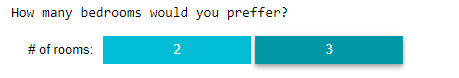

In [19]:
Image("q1.png")

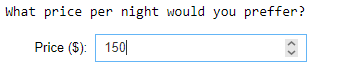

In [20]:
Image("q2.png")

Price is the factor that is the most important to all the users. Based on the value that user inputs the score that will be assigned depends. Also, the number of bedrooms is somethin of great value to the users cause everyone wants to get those result sets at the beginning and not houses with less/more rooms which they probably won't need them or 


Rules of the new scoring function:

1. if 0=<average_rate_per_night<=chosen_avg_price/2 score is 0.45
2. if chosen_avg_price/2<average_rate_per_night<=chosen_avg_price score is 0.25
3. if chosen_avg_price/2<average_rate_per_night<=chosen_avg_price score is 0.05
4. if 'bedrooms_count' is equal to the chosen_no_rooms is 0.25
       
       
       
       

In [21]:
user_input,explanatory_df=functions.example_score()
print('User input: \n',user_input)
explanatory_df

User input: 
    chosen_avg_price  chosen_no_rooms
0  150               3              


,bedrooms_count,B score,average_rate_per_night,R score,BR score
0,2,0.00,50,0.45,0.45
1,3,0.25,100,0.25,0.50
2,3,0.25,250,0.05,0.30
3,4,0.00,550,0.00,0.00


In [24]:
#process_first_question
chosen_no_rooms=w1.get_interact_value()
#process_second_question
chosen_avg_price=w2.get_interact_value()
score_lst,heapified_tuples=functions.new_score(doc_id_rs,chosen_avg_price,chosen_no_rooms)

In [25]:
heapified_tuples

[(0, 2022), (0, 5806), (0.3, 9099), (0.45, 544), (0.25, 12787)]

In [26]:
sorted_scores=nlargest(len(heapified_tuples),heapified_tuples)

In [27]:
sorted_docs_dic=defaultdict(list)
#counter=1
for tup in sorted_scores:
    sorted_docs_dic[tup[0]].append(tup[1])
#    counter=counter+1
sorted_docs_dic

defaultdict(list, {0: [5806, 2022], 0.25: [12787], 0.3: [9099], 0.45: [544]})

In [28]:
sorted_docs_rank_dic=defaultdict(list)
counter_rank=1
for k,v in sorted_docs_dic.items():
    k=counter_rank
    sorted_docs_rank_dic[k]=v
    counter_rank=counter_rank+1
sorted_docs_rank_dic

defaultdict(list, {1: [544], 2: [9099], 3: [12787], 4: [5806, 2022]})

In [32]:
ranking_dict=functions.ranking_BR_score(heapified_tuples)
ranking_dict

OrderedDict([(544, 1), (9099, 2), (12787, 3), (5806, 4), (2022, 4)])

In [30]:
ranking_dict=OrderedDict()
for k,v in (sorted_docs_rank_dic.items()):
    for list_val in v:
        ranking_dict[list_val]=k

In [31]:
ranking_dict

OrderedDict([(544, 1), (9099, 2), (12787, 3), (5806, 4), (2022, 4)])

In [33]:
df=functions.finalize_output(list(ranking_dict.keys()))
df['ranking']=ranking_dict.values()#(df.index+1)

In [34]:
df[['ranking','title','description','city','url']]
df.set_index('ranking')

,title,description,city,url
ranking,,,,
1,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
2,"Bay view condo with pool , boat dock sleeps 5-6","The modern newly remodeled Tortuga Bay Bay front Condo with private boat dock offers 2 Bedrooms, (Sleeps up to 6) 2 Full Baths, Resort Pool, Hot Tub, Breathtaking Bayfront Balcony, Full Size-Fully Equipped Kitchen, LCD TVs, Wi-Fi , and so Much More than the Mind Can Conceive!\n\n2 Bedrooms (2-Queen Beds, 2-Twin Beds)\nBay front Balcony, Fully Equipped Kitchen, Washer and Dryer\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\nResort Pool and Hot Tub \nPrivate Boat Dock, Outstanding Bay Views",South Padre Island,https://www.airbnb.com/rooms/18813079
3,Owner's Special Newly Remodeled Beachfront Condo,"The modern newly remodeled in 2017 Sea Vista Beachfront Condo offers 2 Bedrooms, (Sleeps up to 6) \n\n2 Bedrooms (1-King Bed, 2-Full Beds)\nBeachfront Balcony, Fully Equipped Kitchen, Washer and Dryer\nCentral Air Conditioner\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\n2 Resort Pools, 2 Hot Tub and 2 Tennis Courts\nPrivate Beach Access, Gulf and Oceanfront Views\nGated Entry and Elevator",South Padre Island,https://www.airbnb.com/rooms/19565733
4,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a sprawling theme park with water rides, nearby live music at the numerous libation stations, McAdoos Seafood Company, and pioneer craft shops. Located just 15 miles from New Braunfels and Gruene,\nJust 5 miles south of Estrella Del Lago, the Whitewater amphitheater has become known as the Live Music Show Capital of south Texas, with 20 live performances featuring more than 50 shows. Shows